# Load Data

In [1]:
"""
This script establishes a connection to a Presto database via the Trino Python client,
executes a SQL query to fetch data, and then structures the fetched data into a pandas DataFrame.
The DataFrame is organized with appropriate column names, making the data ready for analysis.
"""

import trino
import pandas as pd
import getpass

# Prompting the user for the password
password = getpass.getpass("Enter your password: ")

# Establishing the connection
conn = trino.dbapi.connect(
    host='presto-gateway.corp.mongodb.com',
    port=443,
    user='jiawei.zhou@mongodb.com',
    catalog='awsdatacatalog',
    http_scheme='https',
    auth=trino.auth.BasicAuthentication("jiawei.zhou@mongodb.com", password),
)

# Executing the query
cur = conn.cursor()

query = """
SELECT 
    ultimate_parent_account_id,
    ultimate_parent_account_name,
    date_trunc('month', calendar_date) AS month,
    SUM(num_daily_aha_moment_clusters) AS num_aha_moment_clusters,
    SUM(num_daily_activation_moment_clusters) AS num_activation_moment_clusters,
    SUM(num_daily_production_moment_clusters) AS num_production_moment_clusters,
    SUM(num_daily_created_cluster) AS num_created_cluster,
    SUM(num_daily_deleted_cluster) AS num_deleted_cluster,
    SUM(num_daily_aha_moment_projects) AS num_aha_moment_projects,
    SUM(num_daily_activation_moment_projects) AS num_activation_moment_projects,
    SUM(num_daily_production_moment_projects) AS num_production_moment_projects,
    SUM(num_daily_created_project) AS num_created_project,
    SUM(num_daily_deleted_project) AS num_deleted_project
FROM 
    awsdatacatalog.ns__analytics_postprocessing.flywheel_gm_daily_growth_metrics
WHERE
    calendar_date < date'2024-12-01'
GROUP BY 
    ultimate_parent_account_id, ultimate_parent_account_name, date_trunc('month', calendar_date)
ORDER BY 
    ultimate_parent_account_id, ultimate_parent_account_name, date_trunc('month', calendar_date)
"""

cur.execute(query)

# Extracting the column names
columns = [desc[0] for desc in cur.description]

# Fetching the rows
rows = cur.fetchall()

# Creating the DataFrame with the fetched rows and column names
df_backup = pd.DataFrame(rows, columns=columns)

# Create a copy of the DataFrame
df = df_backup.copy()

# Display the first few rows
df.head()

,ultimate_parent_account_id,ultimate_parent_account_name,month,num_aha_moment_clusters,num_activation_moment_clusters,num_production_moment_clusters,num_created_cluster,num_deleted_cluster,num_aha_moment_projects,num_activation_moment_projects,num_production_moment_projects,num_created_project,num_deleted_project
0,0012K00001avMF1QAM,"WarnerMedia Services, LLC",2022-01-01,2,6,8,10,6,0,3,4,3,1
1,0012K00001avMF1QAM,"WarnerMedia Services, LLC",2022-02-01,10,7,1,25,19,3,1,1,1,0
2,0012K00001avMF1QAM,"WarnerMedia Services, LLC",2022-03-01,2,2,1,9,23,2,2,1,4,0
3,0012K00001avMF1QAM,"WarnerMedia Services, LLC",2022-04-01,14,6,9,24,14,7,1,6,10,3
4,0012K00001avMF1QAM,"WarnerMedia Services, LLC",2022-05-01,5,3,3,10,13,3,1,2,7,0


In [2]:
# ---- Execution Section: No Action Required ----

# Configures pandas to display all rows and columns.

# Set the maximum number of displayed rows to None (show all rows)
pd.set_option("display.max_rows", None)

# Set the maximum number of displayed columns to None (show all columns)
pd.set_option("display.max_columns", None)

# Disable truncation of DataFrame string representations
pd.set_option("display.width", None)

# Disable truncation of column contents
pd.set_option("display.max_colwidth", None)

In [3]:

# Load the landing zone data
landing_zone_df = pd.read_csv('enterprise_flywheel_landing_zone_list.csv')

# Display first few rows
landing_zone_df.head()

,Category,Account Name,Ultimate Parent,Ultimate Parent Account ID (18),Landing Zone Status,Note,In Nicole's POD list?,In Dario's list?,In May's POD list?
0,"FY26 POD, FY25 POD","Adobe, Inc. (f/k/a Adobe Systems Incorporated)","Adobe, Inc. (f/k/a Adobe Systems Incorporated)",001A000000FhCagIAF,Has Landing Zone,NaN,yes,yes,yes
1,"FY26 POD, FY25 POD",Ahold Delhaize,Ahold Delhaize,001A000000yGwWaIAK,Has Landing Zone,NaN,yes,yes,yes
2,"FY26 POD, FY25 POD",Allianz SE,Allianz SE,001A000000xhpnXIAQ,Has Landing Zone,NaN,yes,yes,yes
3,FY26 POD,CIGNA Corporation,CIGNA Corporation,001A000001X3HU6IAN,Has Landing Zone,NaN,yes,yes,yes
4,"FY26 POD, FY25 POD","Cisco Systems, Inc.","Cisco Systems, Inc.",001A000001BQFJHIA5,Has Landing Zone,NaN,yes,yes,yes


# Data Profiling

In [4]:
# Merge landing_zone_df with df on the Ultimate Parent Account ID
df_merged = df.merge(
    landing_zone_df,
    left_on='ultimate_parent_account_id',
    right_on='Ultimate Parent Account ID (18)',
    how='left'
)

# Display first few rows of merged dataframe
print("\nFirst few rows of merged dataframe:")
df_merged.head()


First few rows of merged dataframe:


,ultimate_parent_account_id,ultimate_parent_account_name,month,num_aha_moment_clusters,num_activation_moment_clusters,num_production_moment_clusters,num_created_cluster,num_deleted_cluster,num_aha_moment_projects,num_activation_moment_projects,num_production_moment_projects,num_created_project,num_deleted_project,Category,Account Name,Ultimate Parent,Ultimate Parent Account ID (18),Landing Zone Status,Note,In Nicole's POD list?,In Dario's list?,In May's POD list?
0,0012K00001avMF1QAM,"WarnerMedia Services, LLC",2022-01-01,2,6,8,10,6,0,3,4,3,1,"FY26 POD, FY25 Top 50","WarnerMedia Services, LLC","WarnerMedia Services, LLC",0012K00001avMF1QAM,Sales Motion In Progress,NaN,yes,yes,yes
1,0012K00001avMF1QAM,"WarnerMedia Services, LLC",2022-02-01,10,7,1,25,19,3,1,1,1,0,"FY26 POD, FY25 Top 50","WarnerMedia Services, LLC","WarnerMedia Services, LLC",0012K00001avMF1QAM,Sales Motion In Progress,NaN,yes,yes,yes
2,0012K00001avMF1QAM,"WarnerMedia Services, LLC",2022-03-01,2,2,1,9,23,2,2,1,4,0,"FY26 POD, FY25 Top 50","WarnerMedia Services, LLC","WarnerMedia Services, LLC",0012K00001avMF1QAM,Sales Motion In Progress,NaN,yes,yes,yes
3,0012K00001avMF1QAM,"WarnerMedia Services, LLC",2022-04-01,14,6,9,24,14,7,1,6,10,3,"FY26 POD, FY25 Top 50","WarnerMedia Services, LLC","WarnerMedia Services, LLC",0012K00001avMF1QAM,Sales Motion In Progress,NaN,yes,yes,yes
4,0012K00001avMF1QAM,"WarnerMedia Services, LLC",2022-05-01,5,3,3,10,13,3,1,2,7,0,"FY26 POD, FY25 Top 50","WarnerMedia Services, LLC","WarnerMedia Services, LLC",0012K00001avMF1QAM,Sales Motion In Progress,NaN,yes,yes,yes


In [5]:
df_merged.sample(5)

,ultimate_parent_account_id,ultimate_parent_account_name,month,num_aha_moment_clusters,num_activation_moment_clusters,num_production_moment_clusters,num_created_cluster,num_deleted_cluster,num_aha_moment_projects,num_activation_moment_projects,num_production_moment_projects,num_created_project,num_deleted_project,Category,Account Name,Ultimate Parent,Ultimate Parent Account ID (18),Landing Zone Status,Note,In Nicole's POD list?,In Dario's list?,In May's POD list?
1357,001A000000xkrWpIAI,UnitedHealth Group Inc.,2024-04-01,35,30,14,71,61,29,25,12,46,68,"FY26 POD, FY25 POD",UnitedHealth Group Inc.,UnitedHealth Group Inc.,001A000000xkrWpIAI,Has Landing Zone,NaN,yes,yes,yes
2685,001A000001MPOzqIAH,"Coinbase, Inc.",2024-02-01,13,11,19,18,7,3,2,5,3,0,FY25 Top 50,"Coinbase, Inc.","Coinbase, Inc.",001A000001MPOzqIAH,Has Landing Zone,NaN,NaN,NaN,NaN
129,0012K00001dV0yrQAC,Deloitte Global Services Limited,2024-01-01,1,0,0,2,1,1,0,0,1,1,"FY26 POD, FY25 POD",Deloitte Global Services Limited,Deloitte Global Services Limited,0012K00001dV0yrQAC,Sales Motion In Progress,NaN,yes,yes,yes
263,0012K00001vJmgzQAC,Stichting Ingka Foundation,2023-07-01,0,0,0,0,0,0,0,0,0,0,"FY26 POD, FY25 Top 50",Stichting Ingka Foundation,Stichting Ingka Foundation,0012K00001vJmgzQAC,Has Landing Zone,NaN,yes,yes,yes
2641,001A000001KmzyUIAR,"Fiserv Solutions, LLC.",2023-05-01,0,1,1,2,3,0,1,0,1,0,"FY26 POD, FY25 Top 50","Fiserv Solutions, LLC.","Fiserv Solutions, LLC.",001A000001KmzyUIAR,Sales Motion In Progress,NaN,yes,yes,yes


In [6]:
# Compare unique account counts across different sources
print("\nUnique Account ID Counts Comparison:")
print("-------------------------------------")
print("From landing_zone_df['Ultimate Parent Account ID (18)']:", 
      len(landing_zone_df['Ultimate Parent Account ID (18)'].unique()))
print("\nFrom df_merged['ultimate_parent_account_id']:", 
      df_merged['ultimate_parent_account_id'].nunique())
print("\nFrom df_merged['Ultimate Parent Account ID (18)']:", 
      df_merged['Ultimate Parent Account ID (18)'].nunique())

# Print implications
print("\nImplications:")
print("-------------")
print("1. The landing zone list contains more accounts than our current dataset coverage")
print("2. Some accounts in our current dataset may be missing from the landing zone list") 
print("3. Different row counts indicate we have multiple entries per account (likely time series data)")



Unique Account ID Counts Comparison:
-------------------------------------
From landing_zone_df['Ultimate Parent Account ID (18)']: 115

From df_merged['ultimate_parent_account_id']: 84

From df_merged['Ultimate Parent Account ID (18)']: 83

Implications:
-------------
1. The landing zone list contains more accounts than our current dataset coverage
2. Some accounts in our current dataset may be missing from the landing zone list
3. Different row counts indicate we have multiple entries per account (likely time series data)


# Analysis

In [7]:
# Display unique Landing Zone Status values
print("\nUnique Landing Zone Status values:")
print("----------------------------------")
print(df_merged['Landing Zone Status'].unique())



Unique Landing Zone Status values:
----------------------------------
['Sales Motion In Progress' nan 'Has Landing Zone'
 'Landing Zone Build In Progress' 'Qualified Out' 'Not Sure']


In [8]:
# Filter df_merged to keep only specified Landing Zone Status values
status_to_keep = ['Sales Motion In Progress', 'Has Landing Zone', 'Landing Zone Build In Progress']
df_merged = df_merged[df_merged['Landing Zone Status'].isin(status_to_keep)]

# Display the count of unique accounts per Landing Zone Status
print("\nNumber of unique accounts after filtering Landing Zone Status:")
print("----------------------------------------------------")
unique_counts = df_merged.groupby('Landing Zone Status')['ultimate_parent_account_id'].nunique()
print(unique_counts)
print("\nTotal unique accounts:", df_merged['ultimate_parent_account_id'].nunique())



Number of unique accounts after filtering Landing Zone Status:
----------------------------------------------------
Landing Zone Status
Has Landing Zone                  14
Landing Zone Build In Progress     3
Sales Motion In Progress          58
Name: ultimate_parent_account_id, dtype: int64

Total unique accounts: 75


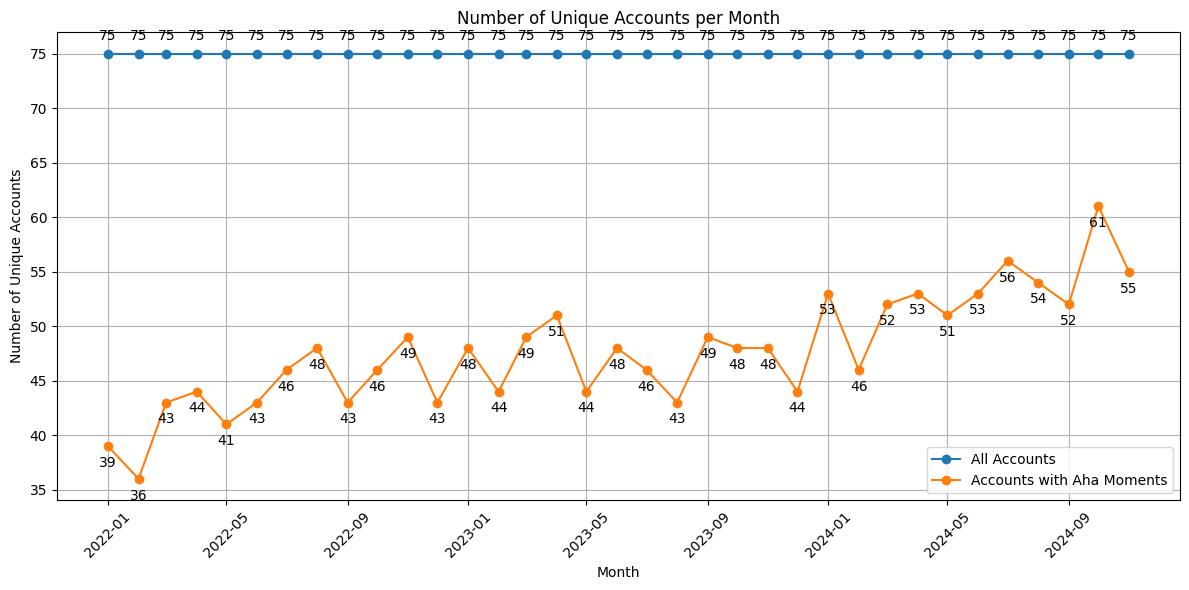


Implications:
-------------
About 50-60 accounts per month show new aha moment clusters, out of 75 total tracked accounts.
A small number (~3) show no new clusters during the entire period.


In [9]:
# Import required library
import matplotlib.pyplot as plt

# Calculate number of unique accounts per month
monthly_unique_accounts = df_merged.groupby('month')['ultimate_parent_account_id'].nunique()

# Calculate number of unique accounts with >0 aha moments per month
monthly_unique_accounts_with_aha = df_merged[df_merged['num_aha_moment_clusters'] > 0].groupby('month')['ultimate_parent_account_id'].nunique()

# Create a line plot
plt.figure(figsize=(12, 6))

# Plot both lines
plt.plot(monthly_unique_accounts.index, monthly_unique_accounts.values, marker='o', label='All Accounts')
plt.plot(monthly_unique_accounts_with_aha.index, monthly_unique_accounts_with_aha.values, marker='o', label='Accounts with Aha Moments')

plt.title('Number of Unique Accounts per Month')
plt.xlabel('Month')
plt.ylabel('Number of Unique Accounts')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# Add labels to the points
for x, y in zip(monthly_unique_accounts.index, monthly_unique_accounts.values):
    plt.annotate(f'{y:.0f}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')
for x, y in zip(monthly_unique_accounts_with_aha.index, monthly_unique_accounts_with_aha.values):
    plt.annotate(f'{y:.0f}', (x, y), textcoords="offset points", xytext=(0,-15), ha='center')

plt.tight_layout()
plt.show()

# Print implications
print("\nImplications:")
print("-------------")
print("About 50-60 accounts per month show new aha moment clusters, out of 75 total tracked accounts.")
print("A small number (~3) show no new clusters during the entire period.")


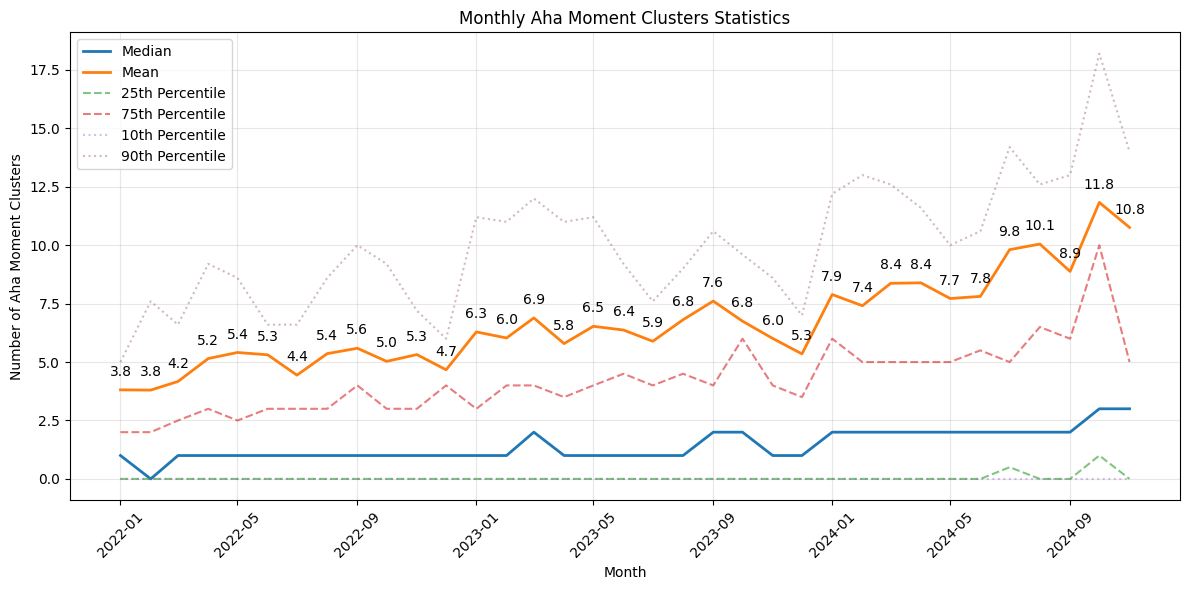

We use average instead of median since median values are too small to be meaningful and not sensitive enough


In [10]:
# Import required library
import matplotlib.pyplot as plt

# Calculate monthly statistics for aha moment clusters
monthly_stats = df_merged.groupby('month')['num_aha_moment_clusters'].agg([
    'median',
    'mean',
    lambda x: x.quantile(0.25),
    lambda x: x.quantile(0.75),
    lambda x: x.quantile(0.10), 
    lambda x: x.quantile(0.90)
]).round(2)

# Rename the columns
monthly_stats.columns = ['median', 'mean', '25%', '75%', '10%', '90%']

# Create the line plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_stats.index, monthly_stats['median'], label='Median', linewidth=2)
mean_line, = plt.plot(monthly_stats.index, monthly_stats['mean'], label='Mean', linewidth=2)
plt.plot(monthly_stats.index, monthly_stats['25%'], '--', label='25th Percentile', alpha=0.6)
plt.plot(monthly_stats.index, monthly_stats['75%'], '--', label='75th Percentile', alpha=0.6)
plt.plot(monthly_stats.index, monthly_stats['10%'], ':', label='10th Percentile', alpha=0.4)
plt.plot(monthly_stats.index, monthly_stats['90%'], ':', label='90th Percentile', alpha=0.4)

# Add data labels for mean values
for x, y in zip(monthly_stats.index, monthly_stats['mean']):
    plt.annotate(f'{y:.1f}', 
                (x, y),
                textcoords="offset points",
                xytext=(0,10),
                ha='center')

plt.title('Monthly Aha Moment Clusters Statistics')
plt.xlabel('Month')
plt.ylabel('Number of Aha Moment Clusters')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("We use average instead of median since median values are too small to be meaningful and not sensitive enough")


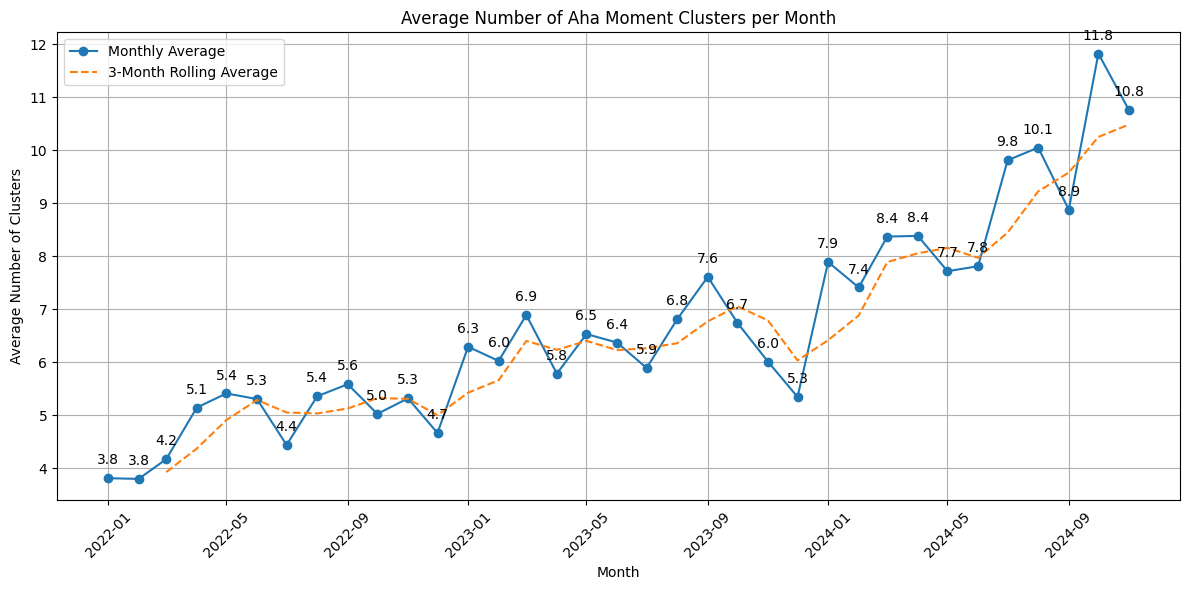

Using 3-month moving average to smooth out volatile monthly Aha Moment cluster counts.


In [11]:
# Import matplotlib
import matplotlib.pyplot as plt

# Calculate average number of aha moment clusters per month
monthly_avg_aha = df_merged.groupby('month')['num_aha_moment_clusters'].mean()

# Calculate 3-month rolling average
rolling_avg = monthly_avg_aha.rolling(window=3).mean()

# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_aha.index, monthly_avg_aha.values, marker='o', label='Monthly Average')
plt.plot(rolling_avg.index, rolling_avg.values, linestyle='--', label='3-Month Rolling Average')
plt.title('Average Number of Aha Moment Clusters per Month')
plt.xlabel('Month')
plt.ylabel('Average Number of Clusters')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# Add labels to the points
for x, y in zip(monthly_avg_aha.index, monthly_avg_aha.values):
    plt.annotate(f'{y:.1f}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()
plt.show()

print("Using 3-month moving average to smooth out volatile monthly Aha Moment cluster counts.")

# Forecast

##### Prophet Model

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
17:37:44 - cmdstanpy - INFO - Chain [1] start processing
17:37:44 - cmdstanpy - INFO - Chain [1] done processing


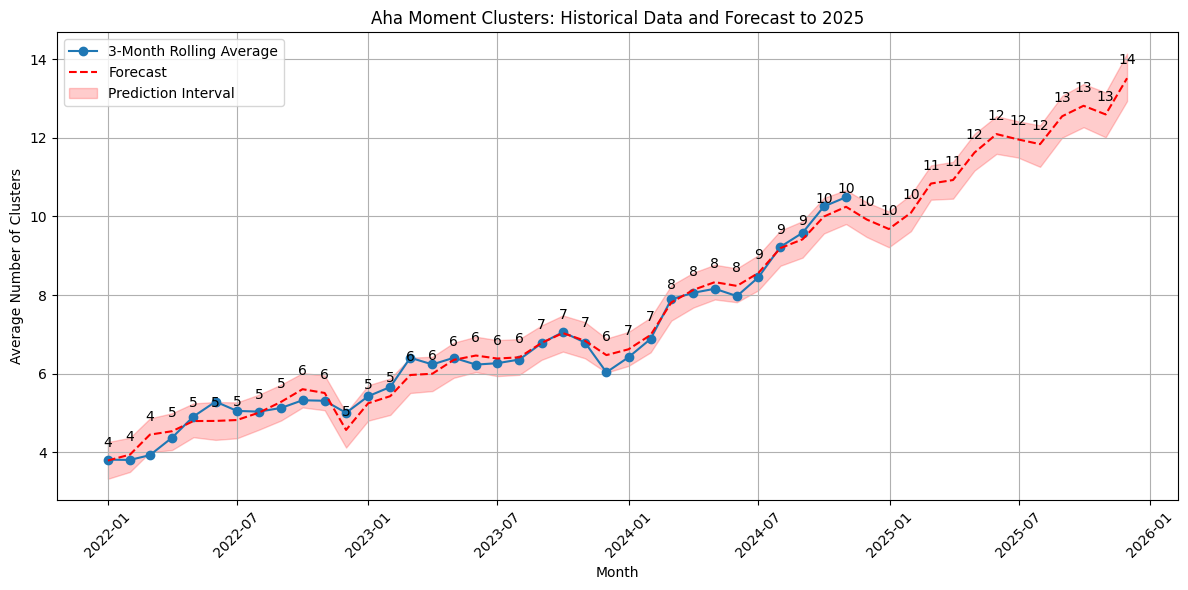

In [12]:
# Import required libraries
import matplotlib.pyplot as plt
from prophet import Prophet
import pandas as pd

# Calculate mean number of aha moment clusters per month
monthly_mean_aha = df_merged.groupby('month')['num_aha_moment_clusters'].mean()

# Calculate 3-month rolling average
rolling_avg = monthly_mean_aha.rolling(window=3, min_periods=1).mean()

# Prepare data for Prophet using rolling average
df_prophet = rolling_avg.reset_index()
df_prophet.columns = ['ds', 'y']

# Initialize and fit Prophet model
model = Prophet(interval_width=0.95)
model.fit(df_prophet)

# Generate future dates through Dec 2025
future = model.make_future_dataframe(periods=36, freq='ME')  # Using ME instead of M

# Make predictions
forecast = model.predict(future)

# Filter forecast data up to Dec 2025
forecast = forecast[forecast['ds'] <= '2025-12-01']

# Get the predicted value for Dec 2025 safely
dec_2025_data = forecast[forecast['ds'] == '2025-12-01']
if len(dec_2025_data) > 0:
    dec_2025_forecast = dec_2025_data['yhat'].values[0]
    show_annotation = True
else:
    show_annotation = False

# Create plot
plt.figure(figsize=(12, 6))
plt.plot(rolling_avg.index, rolling_avg.values, marker='o', label='3-Month Rolling Average')
plt.plot(forecast['ds'], forecast['yhat'], linestyle='--', color='red', label='Forecast')
plt.fill_between(forecast['ds'], 
                 forecast['yhat_lower'], 
                 forecast['yhat_upper'], 
                 color='red', 
                 alpha=0.2,
                 label='Prediction Interval')

# Add data labels for forecast
for x, y in zip(forecast['ds'], forecast['yhat']):
    plt.annotate(f'{y:.0f}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

# Add text annotation for Dec 2025 prediction only if data exists
if show_annotation:
    plt.annotate(f'Dec 2025 Forecast: {dec_2025_forecast:.0f}',
                xy=('2025-12-01', dec_2025_forecast),
                xytext=(30, 30),
                textcoords='offset points',
                ha='left',
                va='bottom',
                bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

plt.title('Aha Moment Clusters: Historical Data and Forecast to 2025')
plt.xlabel('Month')
plt.ylabel('Average Number of Clusters')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

##### Exponential Smoothing Model

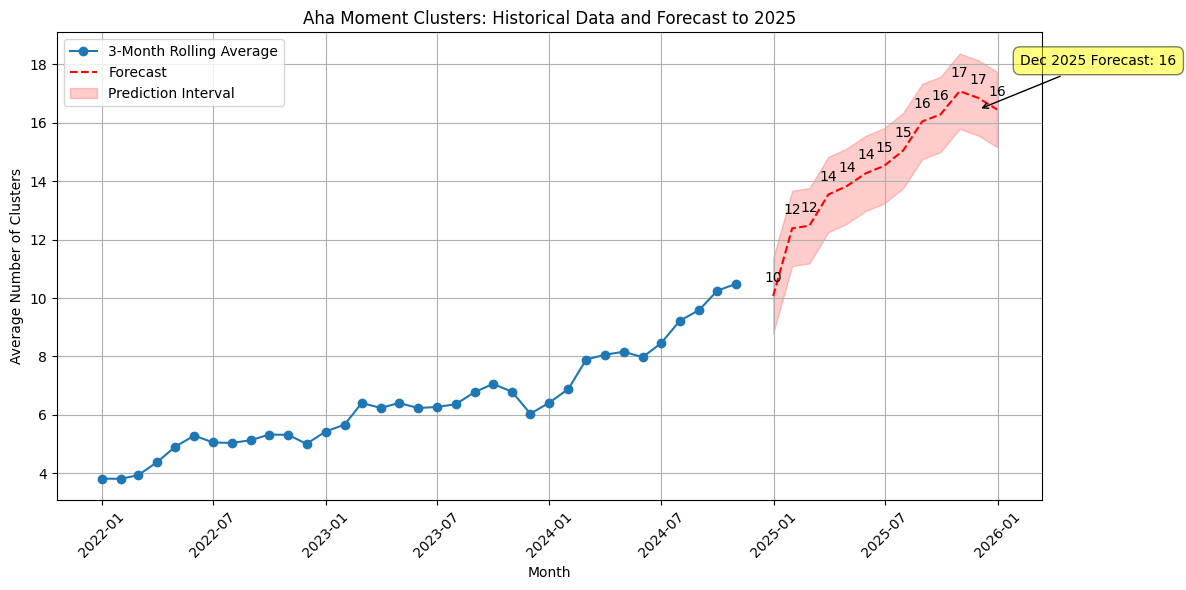

In [13]:
# Import required libraries
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import pandas as pd
import numpy as np
from scipy import stats

# Calculate mean number of aha moment clusters per month
monthly_mean_aha = df_merged.groupby('month')['num_aha_moment_clusters'].mean()

# Calculate 3-month rolling average
rolling_avg = monthly_mean_aha.rolling(window=3, min_periods=1).mean()

# Fit Exponential Smoothing model
model = ExponentialSmoothing(monthly_mean_aha,
                           seasonal_periods=12,
                           trend='add',
                           seasonal='add',
                           freq='MS')  # Monthly start frequency
results = model.fit()

# Generate forecast through Dec 2025
last_date = monthly_mean_aha.index[-1]
forecast_steps = pd.date_range(start=last_date, end=pd.Timestamp('2025-12-01'), freq='ME').shape[0]
forecast = results.forecast(steps=forecast_steps)
forecast_dates = pd.date_range(start=last_date, periods=forecast_steps+1, freq='ME')[1:]

# Calculate confidence intervals
residuals = results.resid
std_resid = np.std(residuals)
z_value = stats.norm.ppf(0.975)  # 95% confidence interval
ci = z_value * std_resid
forecast_lower = forecast - ci
forecast_upper = forecast + ci

# Get Dec 2025 forecast value
dec_2025_data = forecast[forecast.index == pd.Timestamp('2025-12-01')]
if len(dec_2025_data) > 0:
    dec_2025_forecast = dec_2025_data.values[0]
    show_annotation = True
else:
    show_annotation = False

# Create plot
plt.figure(figsize=(12, 6))
plt.plot(rolling_avg.index, rolling_avg.values, marker='o', label='3-Month Rolling Average')
plt.plot(forecast_dates, forecast, linestyle='--', color='red', label='Forecast')
plt.fill_between(forecast_dates,
                 forecast_lower,
                 forecast_upper,
                 color='red',
                 alpha=0.2,
                 label='Prediction Interval')

# Add data labels for forecast
for x, y in zip(forecast_dates, forecast):
    plt.annotate(f'{y:.0f}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

# Add text annotation for Dec 2025 prediction only if data exists
if show_annotation:
    plt.annotate(f'Dec 2025 Forecast: {dec_2025_forecast:.0f}',
                xy=(pd.Timestamp('2025-12-01'), dec_2025_forecast),
                xytext=(30, 30),
                textcoords='offset points',
                ha='left',
                va='bottom',
                bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

plt.title('Aha Moment Clusters: Historical Data and Forecast to 2025')
plt.xlabel('Month')
plt.ylabel('Average Number of Clusters')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

##### Incremental Growth from Enterprise Flywheel

17:37:45 - cmdstanpy - INFO - Chain [1] start processing
17:37:45 - cmdstanpy - INFO - Chain [1] done processing


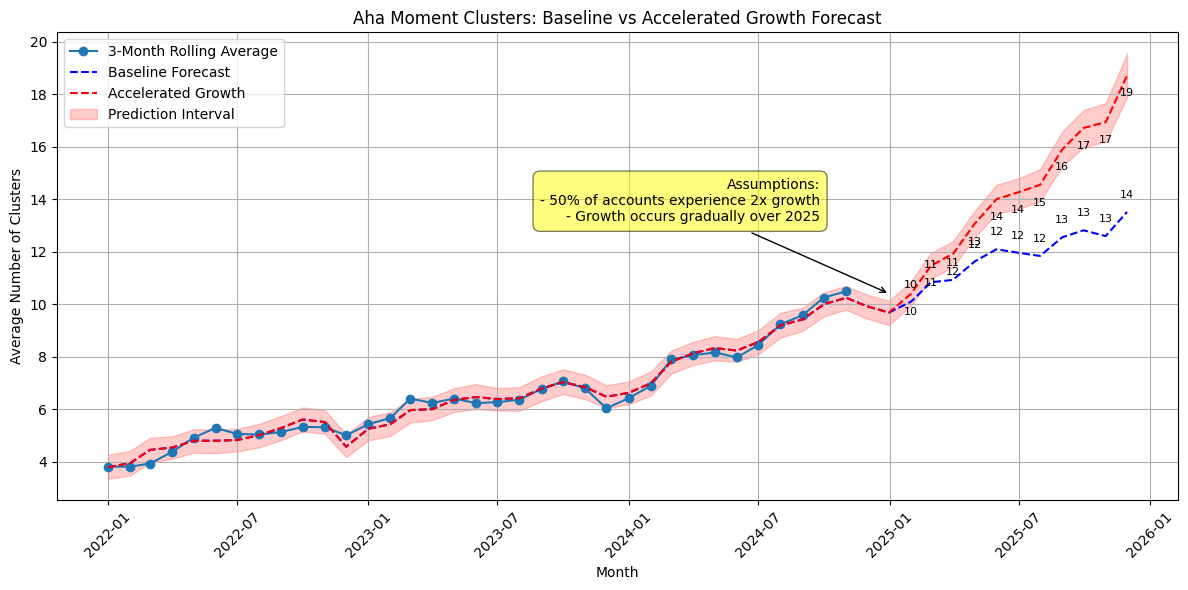

In [14]:
# Calculate mean number of aha moment clusters per month
monthly_mean_aha = df_merged.groupby('month')['num_aha_moment_clusters'].mean()

# Calculate 3-month rolling average
rolling_avg = monthly_mean_aha.rolling(window=3, min_periods=1).mean()

# Prepare data for Prophet using rolling average
df_prophet = rolling_avg.reset_index()
df_prophet.columns = ['ds', 'y']

# Initialize and fit Prophet model
model = Prophet(interval_width=0.95)
model.fit(df_prophet)

# Generate future dates through Dec 2025
future = model.make_future_dataframe(periods=36, freq='ME')  # Using ME instead of M

# Make predictions
forecast = model.predict(future)

# Filter forecast data up to Dec 2025
forecast = forecast[forecast['ds'] <= '2025-12-01']

# Create plot comparing baseline vs accelerated growth
plt.figure(figsize=(12, 6))
plt.plot(rolling_avg.index, rolling_avg.values, marker='o', label='3-Month Rolling Average')

# Plot baseline forecast
plt.plot(forecast['ds'], forecast['yhat'], linestyle='--', color='blue', label='Baseline Forecast')

# Calculate accelerated forecast (50% of accounts with 2x growth)
accelerated_forecast = forecast.copy()
mask_2025_onwards = accelerated_forecast['ds'] >= pd.Timestamp('2025-01-01')
months_from_2025 = (accelerated_forecast.loc[mask_2025_onwards, 'ds'] - pd.Timestamp('2025-01-01')).dt.total_seconds() / (30 * 24 * 60 * 60)
monthly_growth_rate = (2.0 ** (1/12)) - 1

# Apply weighted growth rate
accelerated_forecast.loc[mask_2025_onwards, 'yhat'] = forecast.loc[mask_2025_onwards, 'yhat'] * (1 + 0.5 * monthly_growth_rate) ** months_from_2025
accelerated_forecast.loc[mask_2025_onwards, 'yhat_lower'] = forecast.loc[mask_2025_onwards, 'yhat_lower'] * (1 + 0.5 * monthly_growth_rate) ** months_from_2025  
accelerated_forecast.loc[mask_2025_onwards, 'yhat_upper'] = forecast.loc[mask_2025_onwards, 'yhat_upper'] * (1 + 0.5 * monthly_growth_rate) ** months_from_2025

# Plot accelerated forecast
plt.plot(accelerated_forecast['ds'], accelerated_forecast['yhat'], linestyle='--', color='red', label='Accelerated Growth')

# Add confidence intervals
plt.fill_between(accelerated_forecast['ds'],
                 accelerated_forecast['yhat_lower'],
                 accelerated_forecast['yhat_upper'],
                 color='red',
                 alpha=0.2,
                 label='Prediction Interval')

# Add data labels for forecasts after 2025
mask_2025 = forecast['ds'] >= pd.Timestamp('2025-01-01')
for x, y in zip(forecast.loc[mask_2025, 'ds'], forecast.loc[mask_2025, 'yhat']):
    plt.annotate(f'{y:.0f}', (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)
    
for x, y in zip(accelerated_forecast.loc[mask_2025, 'ds'], accelerated_forecast.loc[mask_2025, 'yhat']):
    plt.annotate(f'{y:.0f}', (x, y), textcoords="offset points", xytext=(0,-15), ha='center', fontsize=8)

# Add December 2025 annotations
dec_2025_baseline = forecast.loc[forecast['ds'] == pd.Timestamp('2025-12-01'), 'yhat'].iloc[0]
dec_2025_accelerated = accelerated_forecast.loc[accelerated_forecast['ds'] == pd.Timestamp('2025-12-01'), 'yhat'].iloc[0]

plt.annotate(f'Dec 2025 Baseline: {dec_2025_baseline:.0f}',
            xy=(pd.Timestamp('2025-12-01'), dec_2025_baseline),
            xytext=(-100, 30),
            textcoords='offset points',
            ha='right',
            va='bottom',
            bbox=dict(boxstyle='round,pad=0.5', fc='lightblue', alpha=0.5),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

plt.annotate(f'Dec 2025 Accelerated: {dec_2025_accelerated:.0f}',
            xy=(pd.Timestamp('2025-12-01'), dec_2025_accelerated),
            xytext=(30, 30),
            textcoords='offset points',
            ha='left',
            va='bottom',
            bbox=dict(boxstyle='round,pad=0.5', fc='pink', alpha=0.5),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

# Add assumptions annotation
plt.annotate('Assumptions:\n- 50% of accounts experience 2x growth\n- Growth occurs gradually over 2025',
            xy=(pd.Timestamp('2025-01-01'), accelerated_forecast.loc[mask_2025_onwards, 'yhat'].iloc[0]),
            xytext=(-50, 50),
            textcoords='offset points',
            ha='right',
            va='bottom',
            bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

plt.title('Aha Moment Clusters: Baseline vs Accelerated Growth Forecast')
plt.xlabel('Month')
plt.ylabel('Average Number of Clusters')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
